# Ex10 - Abrupt monsoon transitions

"The onset of monsoon precipitation in spring is initiated by the development of a tropospheric temperature contrast between land and ocean and associated convergence of moist air over the continent. During the rainy season, the atmospheric heat budget in the monsoon region is then dominated by the so-called moisture–advection feedback:

The release of latent heat by precipitation reinforces the land–ocean tropospheric temperature contrast, thereby stabilizing the circulation that brings in more moist air from the ocean, which in turn maintains precipitation. We argue that the moisture–advection feedback stabilizes the rainy monsoon regime by inducing persistence"

This persistence leads to a hysterisis/"memory effect" that can be represented in a "day-to-day-model" where on any day $t$, the probability for rainfall $\tilde{p}_t$ is calculated as the normalization of percipitation parameters observed on $\tau$ previous days $P_t$:<br/>
- The temporal average of the percipitation $\langle{P}\rangle^{t-1}_{t-\tau}$
- The percipitation extremes $P_{-}$ and $P_{+}$

<div style="font-size: 20px"> $\tilde{p}_t \equiv \frac{\langle{P}\rangle^{t-1}_{t-\tau} - P_{-}}{P_{+} - P_{-}}$ </div>

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def daytoday_probability(P, t, tau, P_strong, P_weak):
    """
    Returns the probability for rain calculated with the given list 
    of percipitation rates observed on previous days that are normalized along 
    given min and max values
    """
    P_avg = np.average(P[(t-1-tau):(t-1)])
    return (P_avg - P_weak) / (P_strong - P_weak)

The probability formula will be used to obtain a modeled precipitation rate by averaging over the rainy/dry days (indicated by `P_strong` and `P_weak`) that are drawn on multiple model runs. We also include additional probability parmameters as constraints for initialisation (`p_init`, to model for different environments) and maximum values (`p_max`, to avoid getting stuck in a state): 

In [9]:
def day_to_day_model(n_years, l_season, P_strong, P_weak, tau, p_init, p_max):
    year_avg_P = np.zeros(n_years)
    for year in range(n_years):
        P_season = np.zeros(l_season)
        for day in range(l_season):
            # use p_init for the beginnign of the season 
            #(before the memory period can be fully utilized))
            if day <= tau:
                p = p_init
            else:
                # calculate the probability with data from previous days
                p = daytoday_probability(P_season, day, tau, P_strong, P_weak)
                # comply with p_max values
                if p > p_max:
                    p = p_max
                elif p < (1 - p_max):
                    p = 1 - p_max
            # Use p to draw either a rainy or a dry day for the model season
            P_season[day] = np.random.choice([P_strong, P_weak], p=[p, (1-p)])
        year_avg_P[year] = np.mean(P_season)
    return(year_avg_P)

### "Historic" model

Fot the first model we use the following parameters

In [10]:
n_years = 6030 # Number of years (seasons) to run
l_season = 135 # Length of season in days
P_strong = 9. # Precipitation in strong (wet) state, mm/day
P_weak = 0. # Precipitation in weak (dry) state, mm/day
tau = 17 # Memory length in time steps (days)
p_init = 0.75 # Initial probability of strong state - p_init <= p_max
p_max = 0.8 # Maximum probability of either state

In [11]:
year_avg_P_historic = day_to_day_model(n_years, l_season, P_strong, P_weak, tau, p_init, p_max)

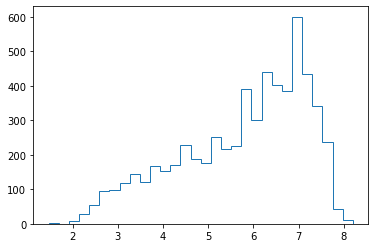

In [15]:
plt.hist(year_avg_P_historic, bins=30, histtype="step")
plt.show()

### "Future" model

In [18]:
n_years = 250 # Number of years (seasons) to run
l_season = 135 # Length of season in days
P_strong = 10.9 # Precipitation in strong (wet) state, mm/day
P_weak = 1.9 # Precipitation in weak (dry) state, mm/day
tau = 17 # Memory length in time steps (days)
p_init = 0.2 # Initial probability of strong state - p_init <= p_max
p_max = 0.82 # Maximum probability of either state

In [19]:
year_avg_P_future = day_to_day_model(n_years, l_season, P_strong, P_weak, tau, p_init, p_max)

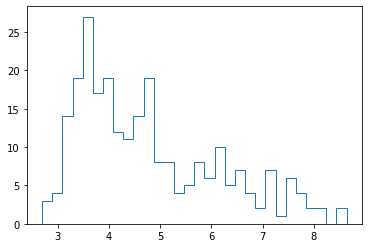

In [21]:
plt.hist(year_avg_P_future, bins=30, histtype="step")
plt.show()